# **Exploratory Credit Data Analisys with SQL**

**The Datas:**

    idade = Customer's age
    sexo = Customer's gender
    dependentes = Number of customer's dependents
    escolaridade = Customer's education level
    estado_civil = Customer's marital status
    salario_anual = Customer's annual salary
    tipo_cartao = Customer's card type
    qtd_produtos = Number of products purchased in the last 12 months
    iteracoes_12m = Number of interactions/transactions in the last 12 months
    meses_inativo_12m = Number of months the customer was inactive
    limite_credito = Customer's credit limit
    valor_transacoes_12m = Value of transactions in the last 12 months
    qtd_transacoes_12m = Number of transactions in the last 12 months

* The table was created with AWS Athena and S3 bucket, with a data version available at: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset.

**First of all, we need to know what we have on our raw material. Lets explore our dataset**

Query: SELECT count(*) FROM credito

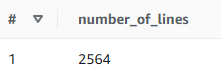

How our dataset is like:

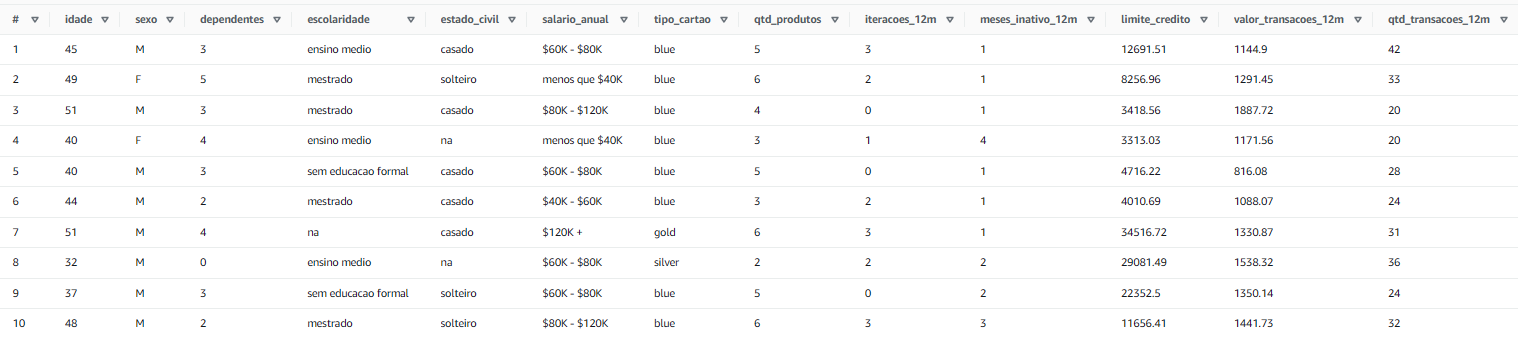

**What are the data types?**

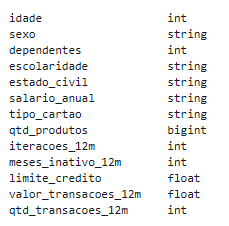

Now that we know what kind of data we have, let's look more closely at the variables that are not numeric

**What kind of education levels do we have available in our dataset?**


Query: SELECT distinct escolaridade FROM credito

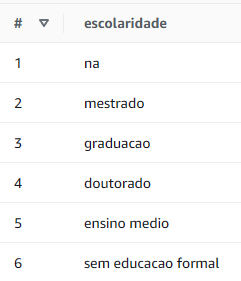


As we can see, there are a lot of education levels and a null variable that we need to look at more closely later.

**What kind of marital status do we have available in our dataset?**

Query: SELECT DISTINCT estado_civil FROM credito

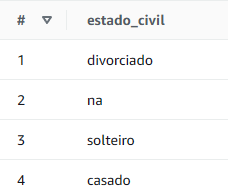

Again we have found null values

**What kind of annual salary we have available in our dataset?**

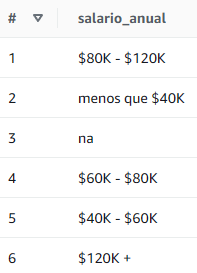

The salaries in this dataset don't expose the exact value that our customer owns. The information we have is the salary range, which also contains null values

**What kind of card types are available in our dataset?**

Query: SELECT DISTINCT tipo_cartao FROM credito

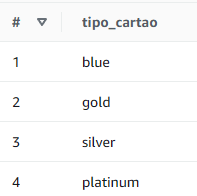


# **Data Analysis**

As we explored the data and seek to understand the information we have in our dataset, we can analyze the information to understand what's happening in the database. So, here are the questions:

**In this database, how many customers do we have in each salary range?**

Query: SELECT count(*) as quantidade_faixa, salario_anual from credito group by salario_anual

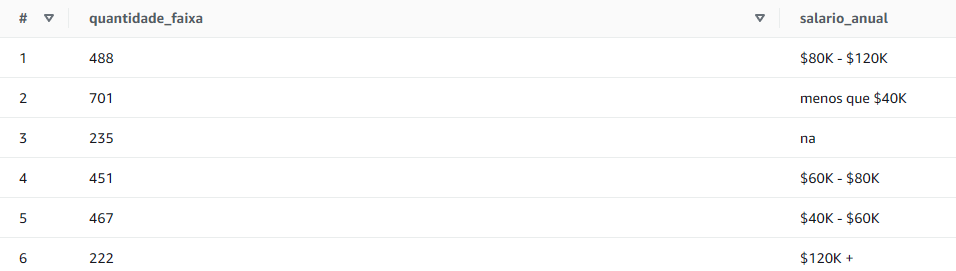


The majority of the customers in this database have a salary range of less than 40K, and there are 235 customers who haven't informed their salary range. In a way, it may be interesting for the company to focus on this lower-income demographic.

**How many costumers are men and how many are women?**

Query: SELECT count(*) as qtd_sexo, sexo from credito group by sexo


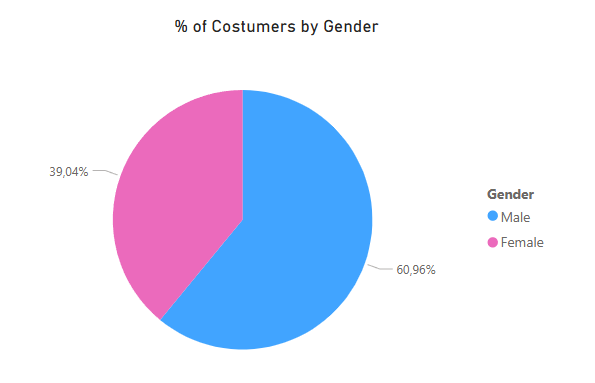

As we can see the majority of the customers in thes database are men

**We want to focus our marketing in an appropriate manner for our customers. What will their age be?**

Query: select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo

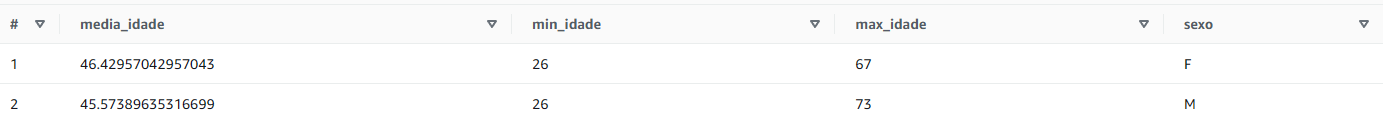

Through this analysis, it was not possible to extract any relevant information. The minimum age for both genders is the same, and the average is very similar. The only difference is the maximum age, but this fact is almost irrelevant since the difference is not that significant.

**What is the largest and smallest transaction of the customers?**

Query: SELECT MIN(valor_transacoes_12m) as transacao_minima, max(valor_transacoes12m) as trasacao_maxima from credito

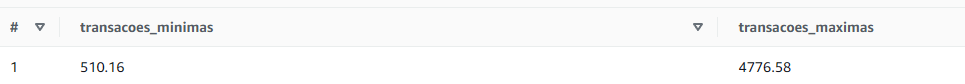

**What are the characteristics of customers who own the largest credits?**

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

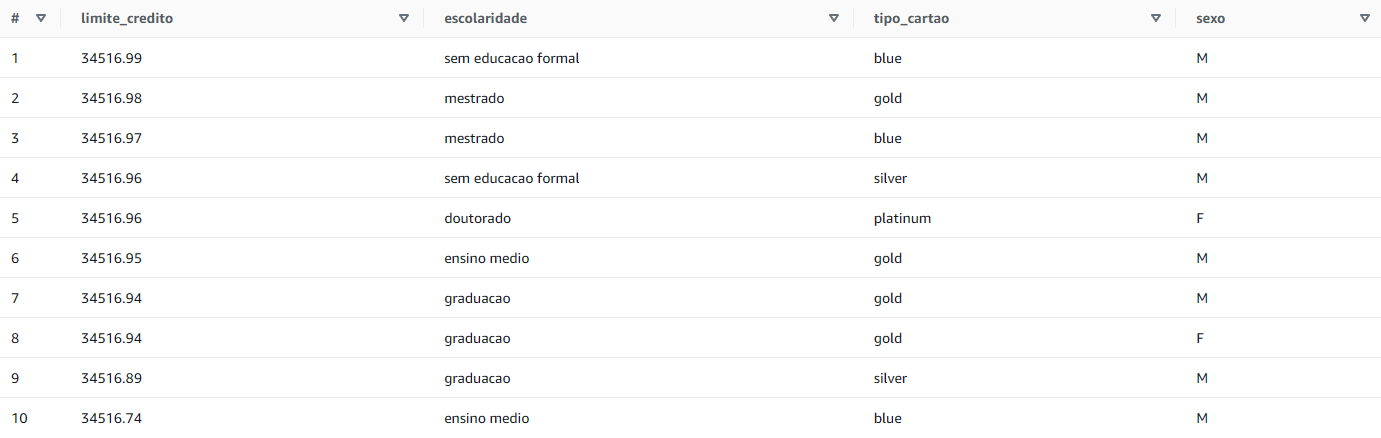

Education level doesn't seem to impact the credit limit. The highest limit is offered to a person without formal education. The card type also doesn't appear to be related to education or credit limit. Among the highest limits, we find customers with gold, silver, platinum, and blue cards.

**What are the characteristics of customers who own the smallest credits?**

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc limit 10

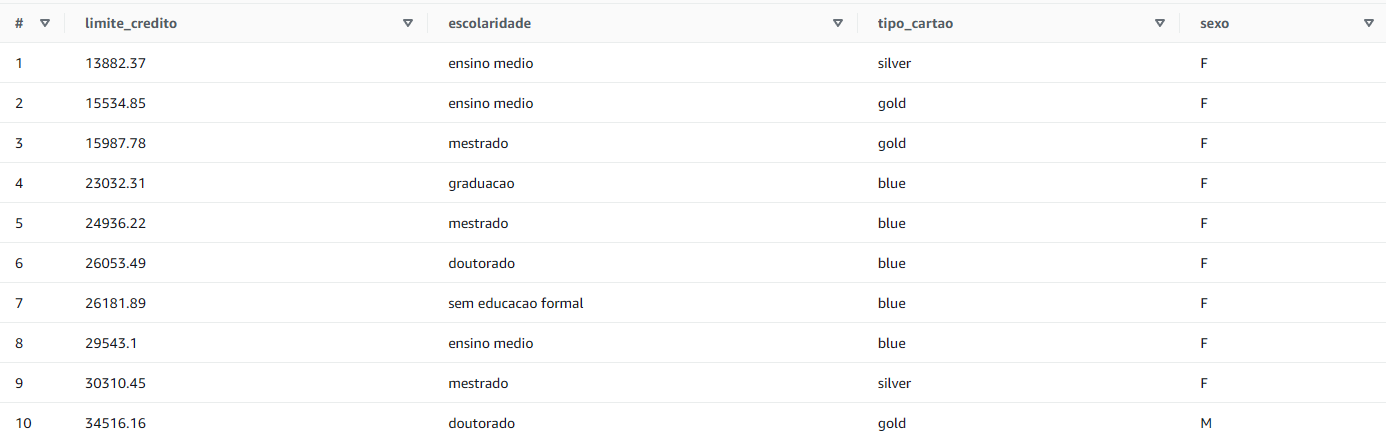

At this time, we can see that there are no customers with a platinum card type among the smallest limits. It is also possible to see that the majority of the smallest limits come from women, while the largest limits come from men.

**Here's a graphical comparison with all values.**


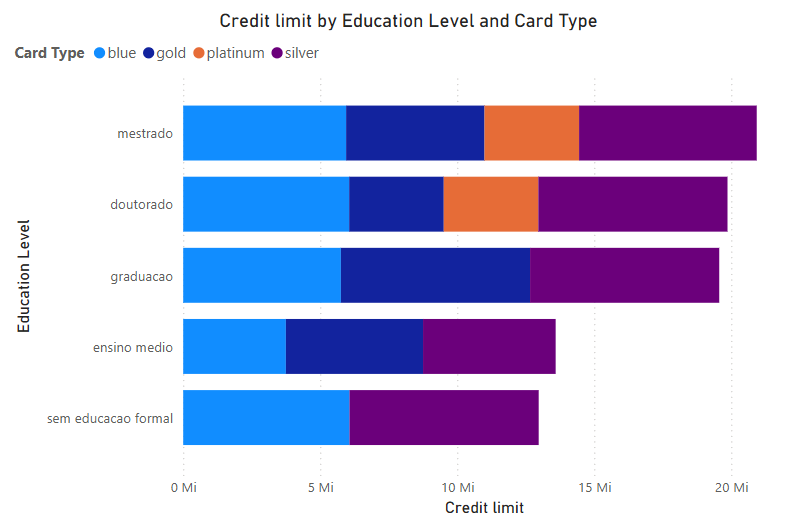

* As we can see, the graduation level has an impact on the limit; in general, those with a master's degree (mestrado) and doctorate (doutorado) have the highest limits.
* The type of card also influences the limits. Although there is a presence of blue, gold, platinum, and silver cards, it seems that most customers with higher education levels (master's and doctorate) tend to have platinum and silver cards, which generally offer higher limits.
* There may be a correlation between education level and the ability to obtain higher credit limits, which may reflect the trust of card issuers in more educated customers.

**Who spends more, women or men?**

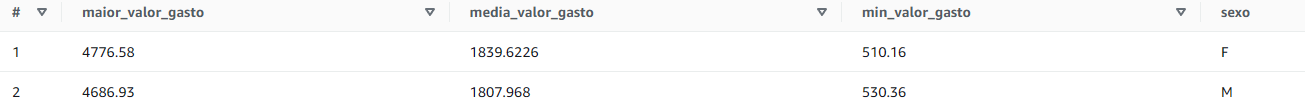

Although the difference in the limits, the spending of men and women is similar.

**Does salary impact the limit?**

Query: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

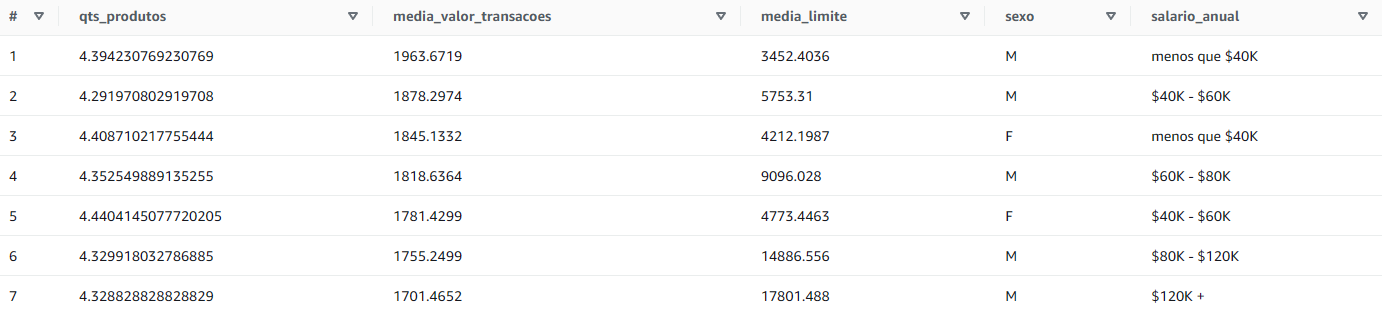

Yes! People with the smallest salaries also show the smallest credit limits.

# **Conclusion**


These were some analyses extracted from the credit dataset.

Some interesting insights:

* Most customers have an income of up to 40K.
* Most customers are male!
* Education level does not seem to influence the credit limit or the type of card.
* Customers with the highest limits are mostly men.
* Customers with the lowest limits are mostly women.
* There are no platinum cards among the lowest limits.
* Salary range directly impacts the credit limit.
* There are no female customers with an annual salary above 60K.